## In this project, we want to use LSTM to predict next process. this is important in scheduling of processes by a processor.

### We will build an LSTM with three sizes of datasets, 5000, 1000, and 200 rows respectively.
### though the datasets are small, it necessarily demonsttrates the power of LSTMS and its ability to learn patterns and its ability to make accurate predictions.
### The data of process execution were gotten from a windown pc using the process_utils library


### Dataset 1: 5000 rows

In [71]:
# Importing the necessary libraries and building the model

In [53]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Load data from csv file
data = pd.read_csv('processes3.csv')

# Create mapping between process name and integer identifier
processes = sorted(list(set(data['pid'])))
process_to_int = dict((p, i) for i, p in enumerate(processes))

# Convert process names to integer identifiers
data['pid'] = data['pid'].apply(lambda x: process_to_int[x])

# Create input-output pairs from sequential data
SEQ_LENGTH = 5 # Length of input sequence
X = []
y = []
for i in range(len(data) - SEQ_LENGTH):
    seq_in = data['pid'][i:i+SEQ_LENGTH]
    seq_out = data['pid'][i+SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert input-output pairs to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode output classes
y = np_utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RNN model
model = Sequential()
model.add(Embedding(len(processes), 32, input_length=SEQ_LENGTH))
model.add(LSTM(128))
model.add(Dense(len(processes), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model on testing data
#loss, accuracy = model.evaluate(X_test, y_test)
#print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))


Epoch 1/50
63/63 [==============================] - 2s 12ms/step - loss: 6.0638 - accuracy: 0.0281 - val_loss: 5.6185 - val_accuracy: 0.0090
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 5.3013 - accuracy: 0.0117 - val_loss: 5.0199 - val_accuracy: 0.0328
Epoch 3/50
63/63 [==============================] - 0s 7ms/step - loss: 4.3529 - accuracy: 0.1588 - val_loss: 3.7687 - val_accuracy: 0.2726
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 3.0919 - accuracy: 0.4378 - val_loss: 2.6181 - val_accuracy: 0.5473
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 2.1367 - accuracy: 0.6827 - val_loss: 1.9006 - val_accuracy: 0.7005
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 1.5606 - accuracy: 0.7817 - val_loss: 1.4907 - val_accuracy: 0.7950
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 1.2045 - accuracy: 0.8328 - val_loss: 1.2328 - val_accuracy: 0.8348
Epoch 8/50
63/63 [=

In [54]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [72]:
#Visualizing the model performance

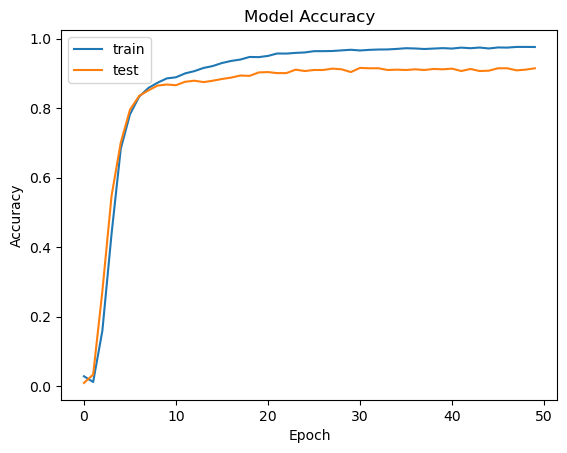

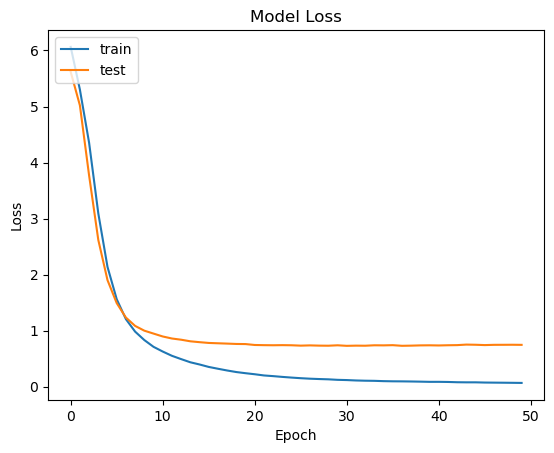

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


# Plot training and validation accuracy over epochs
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("acc_5000.png")
plt.show()

# Plot training and validation loss over epochs
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_5000.png')
plt.show()


In [56]:

# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))


32/32 [==============================] - 0s 4ms/step - loss: 0.7456 - accuracy: 0.9144
Loss: 0.75, Accuracy: 91.44%


### Dataset 2: 1000 rows

In [73]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Load data from csv file
data = pd.read_csv('processes4.csv')

# Create mapping between process name and integer identifier
processes = sorted(list(set(data['pid'])))
process_to_int = dict((p, i) for i, p in enumerate(processes))

# Convert process names to integer identifiers
data['pid'] = data['pid'].apply(lambda x: process_to_int[x])

# Create input-output pairs from sequential data
SEQ_LENGTH = 5 # Length of input sequence
X = []
y = []
for i in range(len(data) - SEQ_LENGTH):
    seq_in = data['pid'][i:i+SEQ_LENGTH]
    seq_out = data['pid'][i+SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert input-output pairs to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode output classes
y = np_utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RNN model
model = Sequential()
model.add(Embedding(len(processes), 32, input_length=SEQ_LENGTH))
model.add(LSTM(128))
model.add(Dense(len(processes), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
13/13 [==============================] - 2s 40ms/step - loss: 5.4868 - accuracy: 0.0389 - val_loss: 5.4830 - val_accuracy: 0.1055
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 5.4743 - accuracy: 0.1910 - val_loss: 5.4752 - val_accuracy: 0.0754
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 5.4543 - accuracy: 0.2601 - val_loss: 5.4571 - val_accuracy: 0.0452
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 5.4079 - accuracy: 0.2638 - val_loss: 5.4099 - val_accuracy: 0.0503
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 5.2558 - accuracy: 0.2412 - val_loss: 5.2346 - val_accuracy: 0.0302
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 4.6824 - accuracy: 0.1143 - val_loss: 4.8435 - val_accuracy: 0.0151
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 3.7761 - accuracy: 0.1985 - val_loss: 3.9817 - val_accuracy: 0.0704
Epoch 8/50
13/13 [

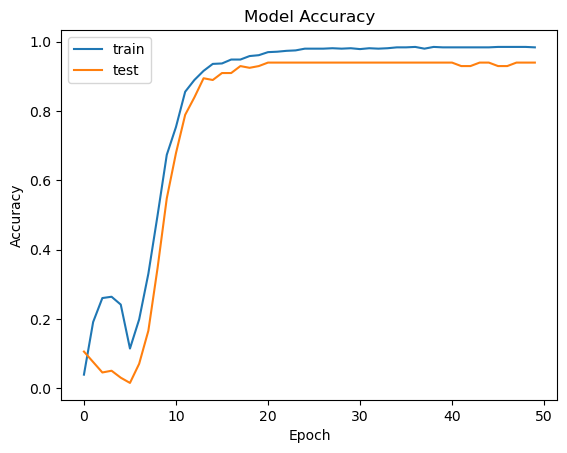

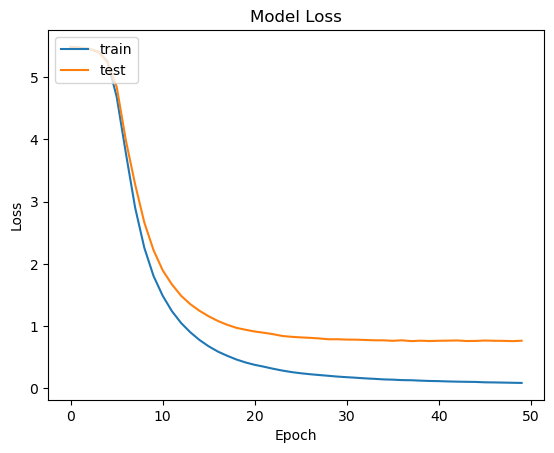

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training and validation accuracy over epochs
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('acc_1000.png')
plt.show()

# Plot training and validation loss over epochs
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_1000.png")
plt.show()

In [75]:
# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

7/7 [==============================] - 0s 4ms/step - loss: 0.7647 - accuracy: 0.9397
Loss: 0.76, Accuracy: 93.97%


### Dataset 3: 200 rows

In [76]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Load data from csv file
data = pd.read_csv('processes5.csv')

# Create mapping between process name and integer identifier
processes = sorted(list(set(data['pid'])))
process_to_int = dict((p, i) for i, p in enumerate(processes))

# Convert process names to integer identifiers
data['pid'] = data['pid'].apply(lambda x: process_to_int[x])

# Create input-output pairs from sequential data
SEQ_LENGTH = 5 # Length of input sequence
X = []
y = []
for i in range(len(data) - SEQ_LENGTH):
    seq_in = data['pid'][i:i+SEQ_LENGTH]
    seq_out = data['pid'][i+SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert input-output pairs to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode output classes
y = np_utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RNN model
model = Sequential()
model.add(Embedding(len(processes), 32, input_length=SEQ_LENGTH))
model.add(LSTM(128))
model.add(Dense(len(processes), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
3/3 [==============================] - 2s 173ms/step - loss: 5.2843 - accuracy: 0.0000e+00 - val_loss: 5.2864 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 5.2800 - accuracy: 0.0321 - val_loss: 5.2903 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 5.2766 - accuracy: 0.0513 - val_loss: 5.2944 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 5.2731 - accuracy: 0.1090 - val_loss: 5.2990 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 5.2694 - accuracy: 0.1538 - val_loss: 5.3043 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 5.2652 - accuracy: 0.1859 - val_loss: 5.3104 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 5.2604 - accuracy: 0.2308 - val_loss: 5.3179 - val_accuracy: 0.000

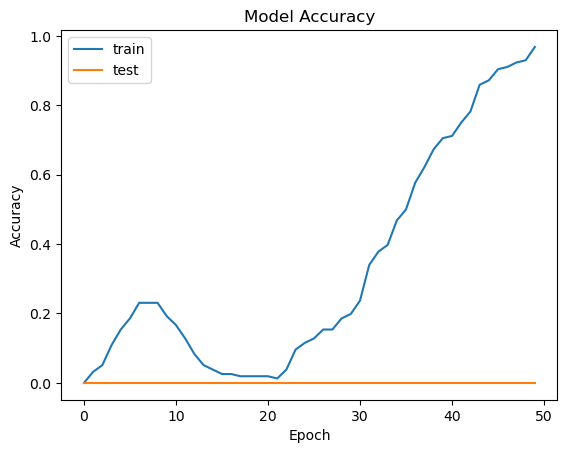

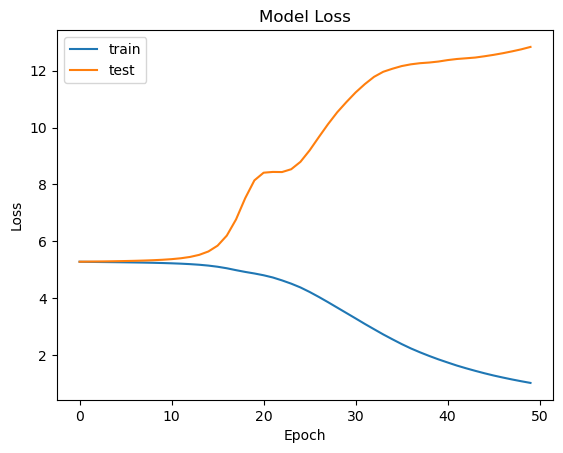

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training and validation accuracy over epochs
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('acc_200.png')
plt.show()

# Plot training and validation loss over epochs
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_200.png')
plt.show()

In [78]:
# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

2/2 [==============================] - 0s 5ms/step - loss: 12.8324 - accuracy: 0.0000e+00
Loss: 12.83, Accuracy: 0.00%


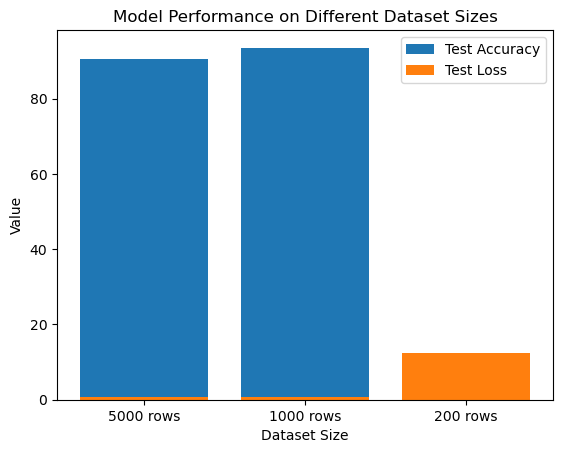

In [63]:
import matplotlib.pyplot as plt

# Data for the bar chart
test_accuracy = [90.5, 93.5, 0]
test_loss = [0.78, 0.7, 12.5]
dataset_sizes = ['5000 rows', '1000 rows', '200 rows']

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(dataset_sizes, test_accuracy, label='Test Accuracy')
ax.bar(dataset_sizes, test_loss, label='Test Loss')
ax.set_xlabel('Dataset Size')
ax.set_ylabel('Value')
ax.set_title('Model Performance on Different Dataset Sizes')
ax.legend()

plt.show()


### Visualizing the performance of the three datasets

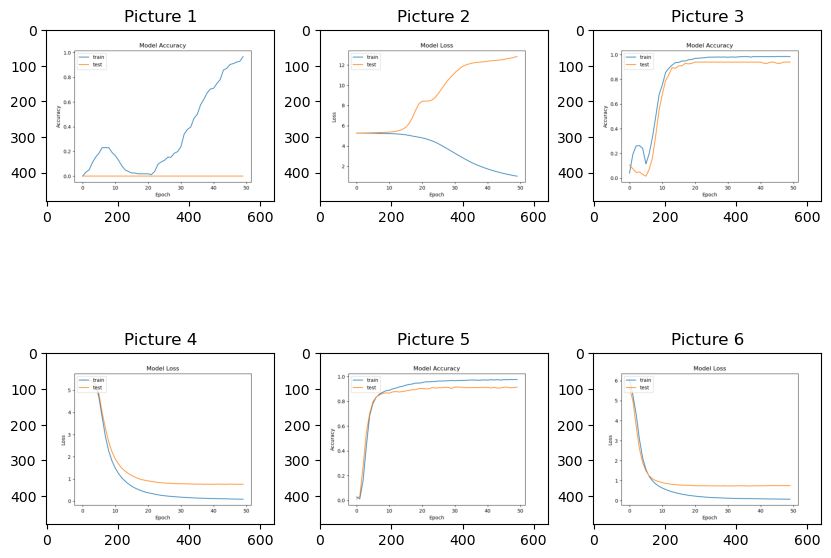

In [79]:

# Create a 2x3 figure
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

# Load the six pictures
pic1 = plt.imread('Acc_200.png')
pic2 = plt.imread('Loss_200.png')
pic3 = plt.imread('Acc_1000.png')
pic4 = plt.imread('Loss_1000.png')
pic5 = plt.imread('Acc_5000.png')
pic6 = plt.imread('Loss_5000.png')

# Add each picture to a different subplot
axs[0, 0].imshow(pic1)
axs[0, 1].imshow(pic2)
axs[0, 2].imshow(pic3)
axs[1, 0].imshow(pic4)
axs[1, 1].imshow(pic5)
axs[1, 2].imshow(pic6)

# Add titles to each subplot
axs[0, 0].set_title('Picture 1')
axs[0, 1].set_title('Picture 2')
axs[0, 2].set_title('Picture 3')
axs[1, 0].set_title('Picture 4')
axs[1, 1].set_title('Picture 5')
axs[1, 2].set_title('Picture 6')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Display the figure
plt.show()


In [80]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [81]:
X

array([[  0,   1,   2,   3,   4],
       [  1,   2,   3,   4,   5],
       [  2,   3,   4,   5,   6],
       [  3,   4,   5,   6,   7],
       [  4,   5,   6,   7,   8],
       [  5,   6,   7,   8,   9],
       [  6,   7,   8,   9,  10],
       [  7,   8,   9,  10,  11],
       [  8,   9,  10,  11,  12],
       [  9,  10,  11,  12,  13],
       [ 10,  11,  12,  13,  14],
       [ 11,  12,  13,  14,  15],
       [ 12,  13,  14,  15,  16],
       [ 13,  14,  15,  16,  17],
       [ 14,  15,  16,  17,  18],
       [ 15,  16,  17,  18,  19],
       [ 16,  17,  18,  19,  20],
       [ 17,  18,  19,  20,  21],
       [ 18,  19,  20,  21,  22],
       [ 19,  20,  21,  22,  23],
       [ 20,  21,  22,  23,  24],
       [ 21,  22,  23,  24,  25],
       [ 22,  23,  24,  25,  26],
       [ 23,  24,  25,  26,  27],
       [ 24,  25,  26,  27,  28],
       [ 25,  26,  27,  28,  29],
       [ 26,  27,  28,  29,  30],
       [ 27,  28,  29,  30,  31],
       [ 28,  29,  30,  31,  32],
       [ 29,  

#### Using a sequence length of 15

In [82]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Load data from csv file
data = pd.read_csv('processes4.csv')

# Create mapping between process name and integer identifier
processes = sorted(list(set(data['pid'])))
process_to_int = dict((p, i) for i, p in enumerate(processes))

# Convert process names to integer identifiers
data['pid'] = data['pid'].apply(lambda x: process_to_int[x])

# Create input-output pairs from sequential data
SEQ_LENGTH = 15 # Length of input sequence
X = []
y = []
for i in range(len(data) - SEQ_LENGTH):
    seq_in = data['pid'][i:i+SEQ_LENGTH]
    seq_out = data['pid'][i+SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert input-output pairs to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode output classes
y = np_utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RNN model
model = Sequential()
model.add(Embedding(len(processes), 32, input_length=SEQ_LENGTH))
model.add(LSTM(128))
model.add(Dense(len(processes), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

Epoch 1/50
13/13 [==============================] - 2s 43ms/step - loss: 5.4873 - accuracy: 0.0203 - val_loss: 5.4833 - val_accuracy: 0.0457
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 5.4724 - accuracy: 0.1650 - val_loss: 5.4709 - val_accuracy: 0.0406
Epoch 3/50
13/13 [==============================] - 0s 13ms/step - loss: 5.4231 - accuracy: 0.1294 - val_loss: 5.3604 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 0s 13ms/step - loss: 5.0799 - accuracy: 0.0203 - val_loss: 5.0542 - val_accuracy: 0.0051
Epoch 5/50
13/13 [==============================] - 0s 17ms/step - loss: 4.6261 - accuracy: 0.0305 - val_loss: 4.7440 - val_accuracy: 0.0102
Epoch 6/50
13/13 [==============================] - 0s 15ms/step - loss: 4.2218 - accuracy: 0.0787 - val_loss: 4.4237 - val_accuracy: 0.0305
Epoch 7/50
13/13 [==============================] - 0s 14ms/step - loss: 3.8536 - accuracy: 0.1041 - val_loss: 4.1266 - val_accuracy: 0.0508
Epoch 8/5

In [83]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Load data from csv file
data = pd.read_csv('processes3.csv')

# Create mapping between process name and integer identifier
processes = sorted(list(set(data['pid'])))
process_to_int = dict((p, i) for i, p in enumerate(processes))

# Convert process names to integer identifiers
data['pid'] = data['pid'].apply(lambda x: process_to_int[x])

# Create input-output pairs from sequential data
SEQ_LENGTH = 15 # Length of input sequence
X = []
y = []
for i in range(len(data) - SEQ_LENGTH):
    seq_in = data['pid'][i:i+SEQ_LENGTH]
    seq_out = data['pid'][i+SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert input-output pairs to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode output classes
y = np_utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RNN model
model = Sequential()
model.add(Embedding(len(processes), 32, input_length=SEQ_LENGTH))
model.add(LSTM(256))
model.add(Dense(len(processes), activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

Epoch 1/50
63/63 [==============================] - 4s 43ms/step - loss: 5.8476 - accuracy: 0.0062 - val_loss: 5.4351 - val_accuracy: 0.0060
Epoch 2/50
63/63 [==============================] - 2s 39ms/step - loss: 5.1651 - accuracy: 0.0152 - val_loss: 4.7657 - val_accuracy: 0.0229
Epoch 3/50
63/63 [==============================] - 2s 36ms/step - loss: 4.4246 - accuracy: 0.0426 - val_loss: 4.1285 - val_accuracy: 0.0748
Epoch 4/50
63/63 [==============================] - 2s 37ms/step - loss: 3.7914 - accuracy: 0.1170 - val_loss: 3.5414 - val_accuracy: 0.1695
Epoch 5/50
63/63 [==============================] - 2s 39ms/step - loss: 3.1784 - accuracy: 0.2382 - val_loss: 3.0464 - val_accuracy: 0.3021
Epoch 6/50
63/63 [==============================] - 2s 38ms/step - loss: 2.7564 - accuracy: 0.3000 - val_loss: 2.7134 - val_accuracy: 0.3161
Epoch 7/50
63/63 [==============================] - 2s 36ms/step - loss: 2.3750 - accuracy: 0.3995 - val_loss: 2.4621 - val_accuracy: 0.3609
Epoch 8/50
63